In [2]:
from openpyxl import Workbook,load_workbook
import numpy as np
from pandas import DataFrame
import pandas as pd
import math
import matplotlib.pyplot as plt

In [3]:
wb = load_workbook('final.xlsx')
ws = wb.get_sheet_by_name('Sheet1')

letters = ['B','C','D','E','F','G','H','I','J']
datas = []
for l in letters:
	num_lis = []
	for cell in ws[f'{l}2':f'{l}12']:
		old_num = cell[0].value
		if old_num == None:
			old_num = 0
		num_lis.append(old_num)
	datas.append(num_lis)

/var/folders/6m/t9mkcn253vn2pm675lffsjzw0000gn/T/ipykernel_62894/974766299.py:2: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  ws = wb.get_sheet_by_name('Sheet1')


In [4]:
index  = []
for i in range(2009,2020):
	index.append(i)
col = ['str（煤炭）', 'str（石油）', 'str（天然气）', 'eff', 'gro', 'D1', 'D2', 'D3', 'D']
df = DataFrame(data=datas,columns=index,index=col).T

In [5]:
#十年的中间数据
D0 = df.loc[2009,'D']
ln_D0 = math.log(float(df.loc[2009,'D']))
res_2_list = []
R_lis = []
for num in df['D']: 
    if float(num) == D0:
        continue
    ln_Dt = math.log(float(num))
    res_2 = (ln_Dt - ln_D0) / (float(num) - D0)
    res_2_list.append(res_2)
    R = float(num) / D0
    R_lis.append(R)

In [6]:
#不同能源类型的数据1
energy_types = ['D1','D2','D3']
res_1_list = []
for i in energy_types:
    D0i =  df.loc[2009,i]
    ln_D0i = math.log(float(df.loc[2009,i]))
    res_list = []
    for num in df[i]:
        if float(num) == D0i:
            continue
        ln_Dti = math.log(float(num))
        res = (float(num) - D0i) / (ln_Dti - ln_D0i) 
        res_list.append(res)
    res_1_list.append(res_list)

In [7]:
#不同分解的十年数据，共有20个
two_types = ['eff','gro']
res_3_lis = []
for i in energy_types:
    energy_0 = df.loc[2009,i]
    en_res_list = []
    for num in df[i]:
        if float(num) == energy_0:
            continue
        energy_res = math.log(float(num) / energy_0)
        en_res_list.append(energy_res)
    res_3_lis.append(en_res_list)

In [8]:
str_types = ['str（煤炭）','str（石油）','str（天然气）']
res_str_list = []
for i in str_types:
    str0 =  df.loc[2009,i]
    res_list = []
    for num in df[i]:
        if float(num) == str0:
            continue
        res = math.log(float(num) / str0)
        res_list.append(res)
    res_str_list.append(res_list)

In [9]:
#eff,gro
del index[0]
df_1 = DataFrame(res_1_list,columns=index,index=energy_types)
sum_types_lis = []
for i in index:
    sum_types = df_1[i].sum()
    sum_types_lis.append(sum_types)

In [10]:
R_eff_lis = []
R_gro_lis = []
for i in range(10):
    R_eff = math.exp(sum_types_lis[i] * res_2_list[i] * res_3_lis[0][i])
    R_eff_lis.append(R_eff)
    R_gro = math.exp(sum_types_lis[i] * res_2_list[i] * res_3_lis[1][i])
    R_gro_lis.append(R_gro)

In [11]:
#str
df_2 = DataFrame(data=res_str_list,columns=index,index=energy_types)
dff = DataFrame.mul(df_1,df_2) #两个相同index的表格可以进行运算，对应位置相乘--DataFrame.mul(a,b)
sum_str_lis = []
for i in index:
    sum_types = dff[i].sum()
    sum_str_lis.append(sum_types)
R_str_lis = []
for i in range(10):
    R_str = math.exp(sum_str_lis[i] * res_2_list[i])
    R_str_lis.append(R_str)

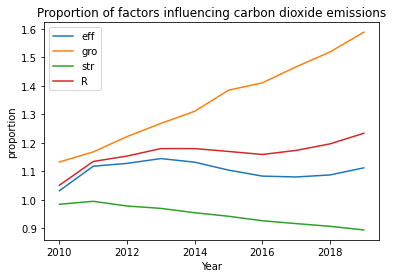

In [12]:
R_all = [R_eff_lis,R_gro_lis,R_str_lis,R_lis]
df_R = DataFrame(data=R_all,columns=index,index=['eff','gro','str','R'])
df_R = df_R.T
df_R.plot()
plt.title('Proportion of factors influencing carbon dioxide emissions')
plt.xlabel('Year')
plt.ylabel('proportion')
plt.show()

In [14]:
df

,str（煤炭）,str（石油）,str（天然气）,eff,gro,D1,D2,D3,D
2009,0.716,0.164,0.035,0.964445,2.611598,1.348236,0.240615,0.039097,1.627948
2010,0.692,0.174,0.040,0.875106,3.073430,1.391423,0.272602,0.047713,1.711738
2011,0.702,0.168,0.046,0.793218,3.621481,1.507597,0.281115,0.058604,1.847316
2012,0.685,0.170,0.048,0.746663,3.977578,1.520910,0.294096,0.063223,1.878229
2013,0.674,0.171,0.053,0.703101,4.357717,1.543853,0.305189,0.072019,1.921060
2014,0.656,0.174,0.057,0.661638,4.705028,1.526708,0.315521,0.078696,1.920924
2015,0.637,0.183,0.059,0.624083,5.011263,1.489356,0.333378,0.081834,1.904568
2016,0.620,0.185,0.062,0.583899,5.398060,1.460952,0.339659,0.086668,1.887279
2017,0.604,0.188,0.070,0.539074,5.985525,1.456991,0.353350,0.100171,1.910512
2018,0.590,0.189,0.078,0.504742,6.588034,1.466719,0.366086,0.115031,1.947835


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


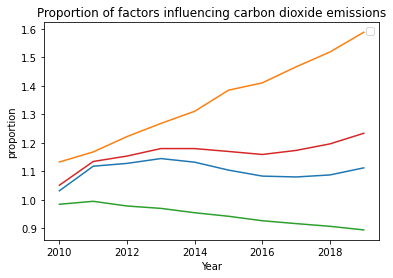

In [15]:
def plot(X):
    plt.plot(X)
    plt.title('Proportion of factors influencing carbon dioxide emissions')
    plt.xlabel('Year')
    plt.ylabel('proportion')
    plt.legend()
    plt.show()
plot(df_R)